<a href="https://colab.research.google.com/github/Jatin1806/Business-Data-Management-Capstone-Project/blob/main/BDM_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
Data = pd.read_csv("Main.csv")

In [ ]:
data = pd.read_csv("Main.csv")

In [ ]:
data.dtypes

Date                    object
Description of Goods    object
HSN No                   int64
Design                  object
Pcs.                     int64
Meter                   object
Rate                    object
Amount                  object
dtype: object

In [ ]:
# Assuming data is your DataFrame
data['Amount'] = data['Amount'].str.replace(',', '', regex=True).astype(float)

In [ ]:
# Assuming data is your DataFrame
data['Rate'] = data['Rate'].str.replace(',', '', regex=True).astype(float)

In [ ]:
data.dtypes

Date                     object
Description of Goods     object
HSN No                    int64
Design                   object
Pcs.                      int64
Meter                    object
Rate                    float64
Amount                  float64
dtype: object

In [ ]:
pip install pysparklines

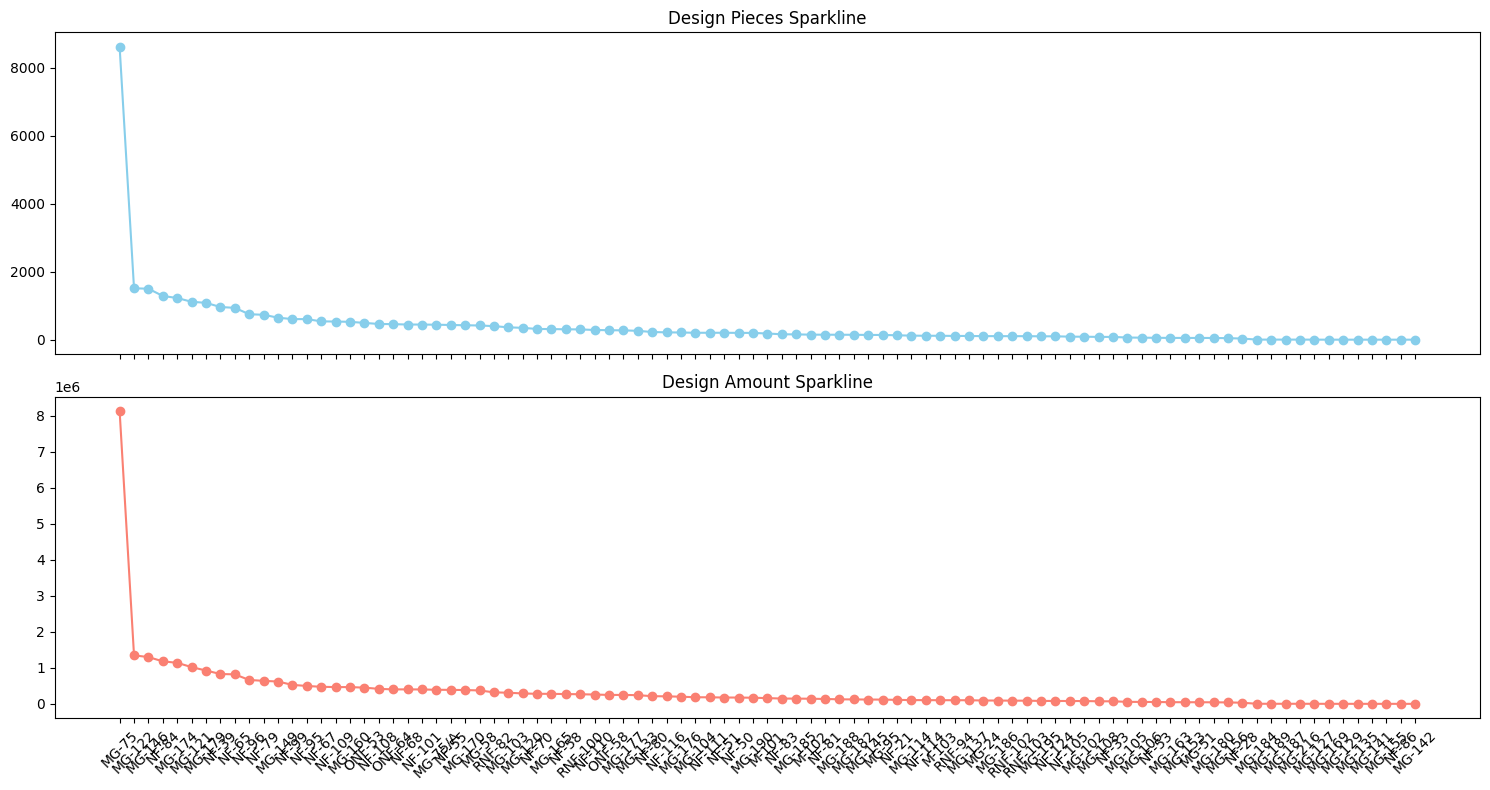

In [ ]:
# Filter the data for 'Saree' category
saree_data = data[data['Description of Goods'] == 'SAREE']

# Group and aggregate the data for each design
design_sales = saree_data.groupby('Design')['Pcs. '].sum().reset_index()
design_amount = saree_data.groupby('Design')['Amount'].sum().reset_index()

# Sort the data by sales (Pcs)
design_sales = design_sales.sort_values(by='Pcs. ', ascending=False)
design_amount = design_amount.sort_values(by='Amount', ascending=False)

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(15, 8))

# Create sparkline for design sales
axs[0].plot(design_sales['Design'], design_sales['Pcs. '], marker='o', linestyle='-', color='skyblue')
axs[0].set_title('Design Pieces Sparkline')
axs[0].set_xticklabels([])

# Create sparkline for design amount
axs[1].plot(design_amount['Design'], design_amount['Amount'], marker='o', linestyle='-', color='salmon')
axs[1].set_title('Design Amount Sparkline')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


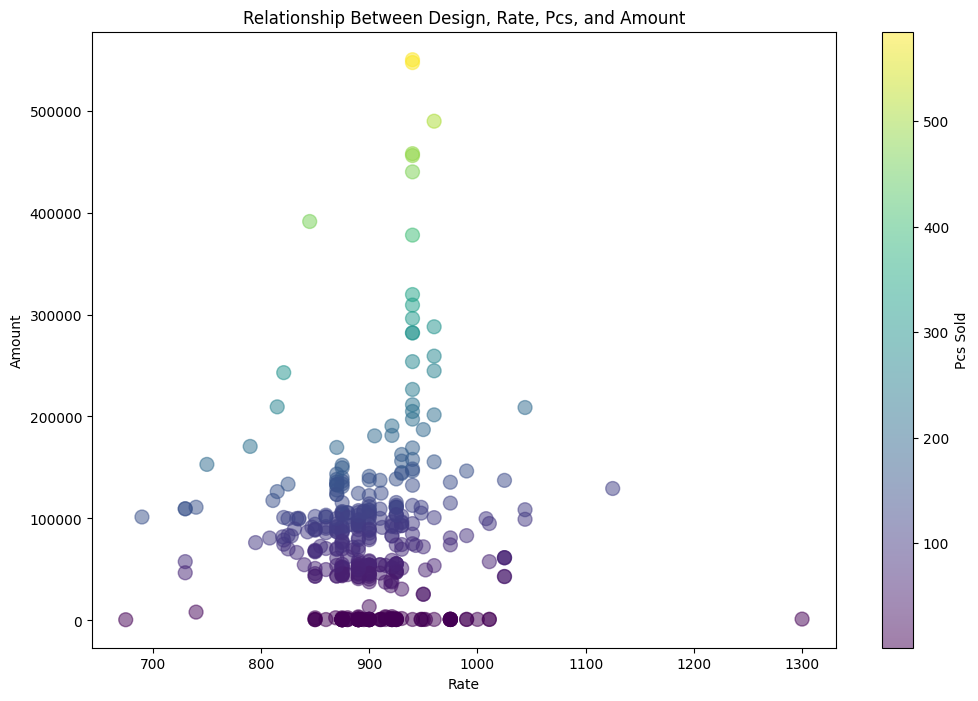

In [ ]:
# Filter the data for 'Saree' category
saree_data = data[data['Description of Goods'] == 'SAREE']

# Extract relevant columns
design = saree_data['Design']
rate = saree_data['Rate']
pcs = saree_data['Pcs. ']
amount = saree_data['Amount']

# Create a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(rate, amount, c=pcs, cmap='viridis', s=100, alpha=0.5)

# Set labels and title
plt.xlabel('Rate')
plt.ylabel('Amount')
plt.title('Relationship Between Design, Rate, Pcs, and Amount')

# Add color bar
plt.colorbar(label='Pcs Sold')

# Show the plot
plt.show()


In [ ]:
Unique_Product = Data['Description of Goods'].unique()
print(Unique_Product)

['SAREE' 'SEMPAL' 'NYLON SAREE' 'MIX SAREE' 'POLYESTER DYED FABRICS']


In [ ]:
rows_with_value = Data[Data.isin(['MIX SAREE']).any(axis=1)]
rows_with_value

,Date,Description of Goods,HSN No,Design,Pcs.,Meter,Rate,Amount
147,22-11-2022,MIX SAREE,54074240,NaN,316,0,661,"2,08,876.00"
243,15-12-2022,MIX SAREE,54074240,NaN,2,0,875,"1,750.00"


In [ ]:
rows_with_value = Data[Data.isin(['POLYESTER DYED FABRICS']).any(axis=1)]
rows_with_value

,Date,Description of Goods,HSN No,Design,Pcs.,Meter,Rate,Amount
454,11-04-2023,POLYESTER DYED FABRICS,54074240,NaN,44,"4,550.25",90,"4,09,522.50"
482,25-04-2023,POLYESTER DYED FABRICS,54074240,NaN,47,"4,750.00",90,"4,27,500.00"
497,13-05-2023,POLYESTER DYED FABRICS,54074240,NaN,420,"4,232.75",90,"3,80,947.50"


### Nylon Saree

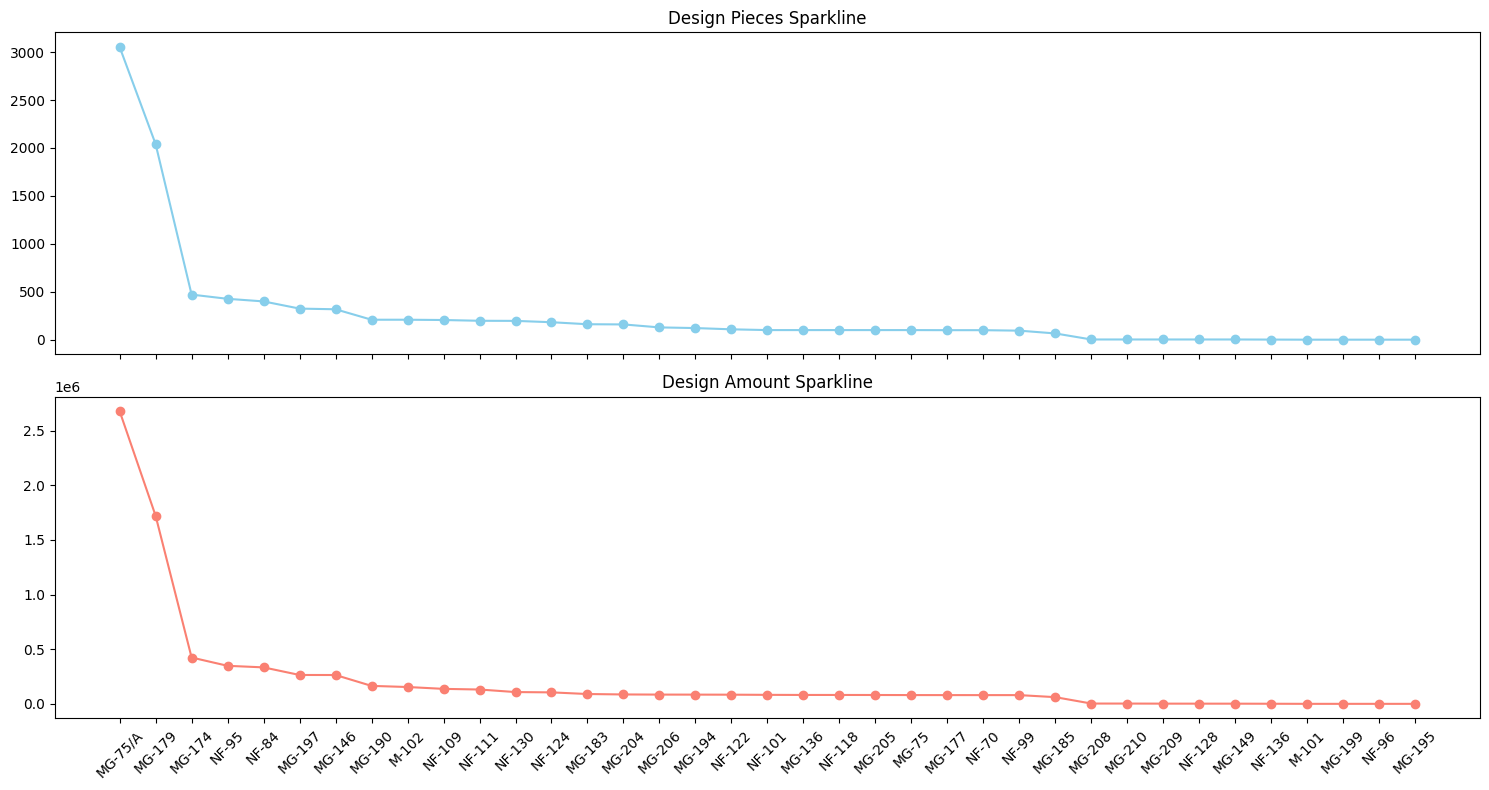

In [ ]:
# Filter the data for 'Saree' category
saree_data = data[data['Description of Goods'] == 'NYLON SAREE']

# Group and aggregate the data for each design
design_sales = saree_data.groupby('Design')['Pcs. '].sum().reset_index()
design_amount = saree_data.groupby('Design')['Amount'].sum().reset_index()

# Sort the data by sales (Pcs)
design_sales = design_sales.sort_values(by='Pcs. ', ascending=False)
design_amount = design_amount.sort_values(by='Amount', ascending=False)

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(15, 8))

# Create sparkline for design sales
axs[0].plot(design_sales['Design'], design_sales['Pcs. '], marker='o', linestyle='-', color='skyblue')
axs[0].set_title('Design Pieces Sparkline')
axs[0].set_xticklabels([])

# Create sparkline for design amount
axs[1].plot(design_amount['Design'], design_amount['Amount'], marker='o', linestyle='-', color='salmon')
axs[1].set_title('Design Amount Sparkline')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


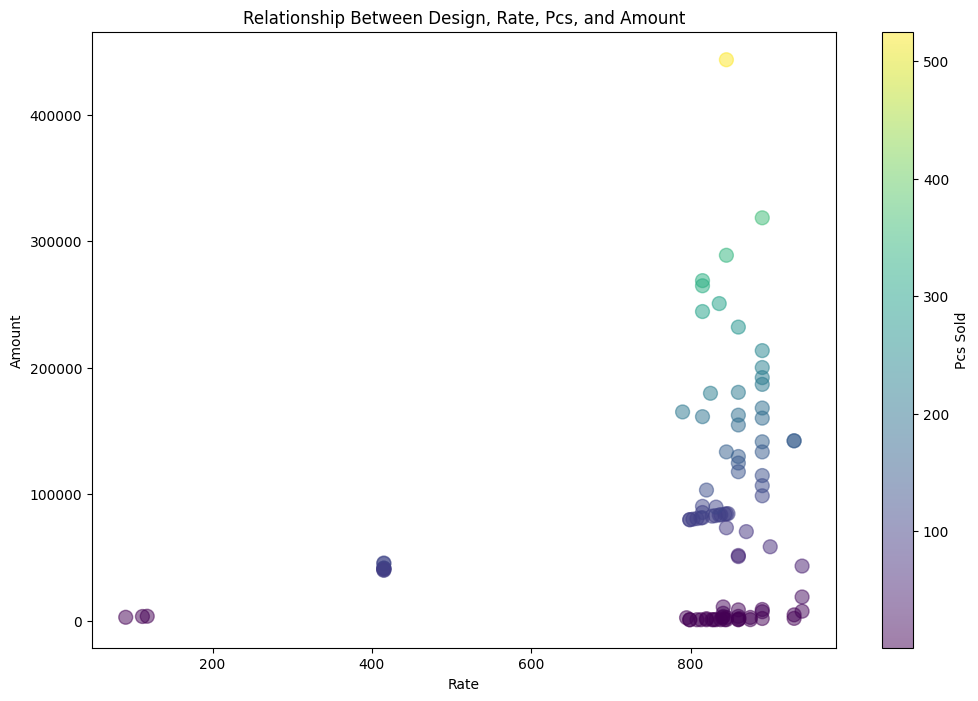

In [ ]:
# Filter the data for 'Saree' category
saree_data = data[data['Description of Goods'] == 'NYLON SAREE']

# Extract relevant columns
design = saree_data['Design']
rate = saree_data['Rate']
pcs = saree_data['Pcs. ']
amount = saree_data['Amount']

# Create a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(rate, amount, c=pcs, cmap='viridis', s=100, alpha=0.5)

# Set labels and title
plt.xlabel('Rate')
plt.ylabel('Amount')
plt.title('Relationship Between Design, Rate, Pcs, and Amount')

# Add color bar
plt.colorbar(label='Pcs Sold')

# Show the plot
plt.show()


<ipython-input-54-73ae9b6ae402>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


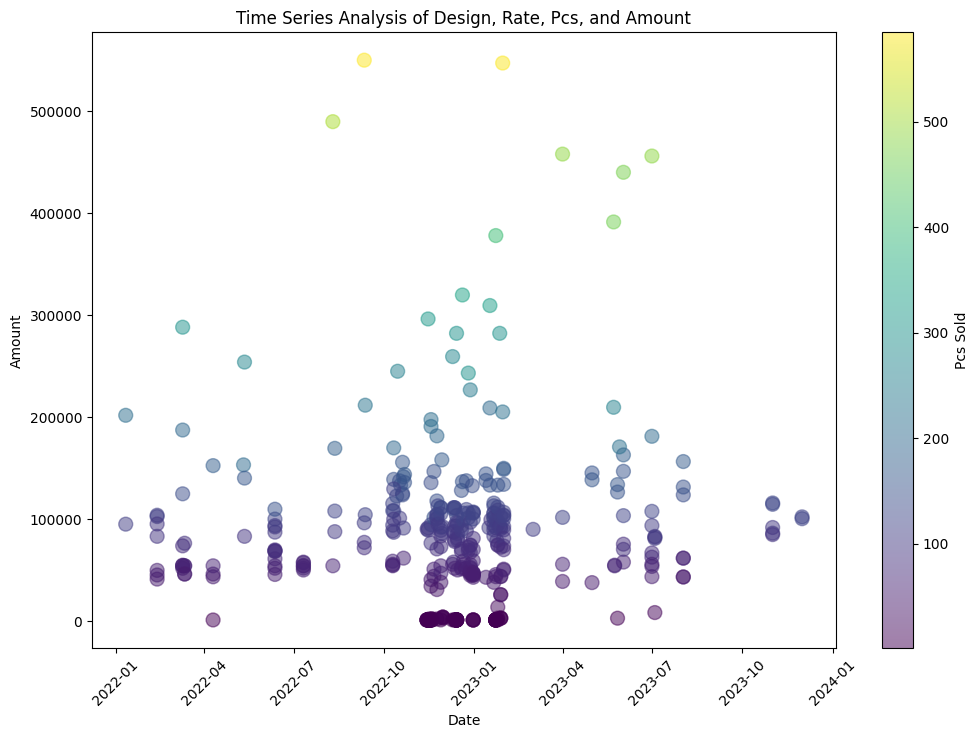

In [ ]:
# Convert the 'Date' column to a datetime data type
data['Date'] = pd.to_datetime(data['Date'])

# Filter the data for 'Saree' category
saree_data = data[data['Description of Goods'] == 'SAREE']

# Extract relevant columns
design = saree_data['Design']
rate = saree_data['Rate']
pcs = saree_data['Pcs. ']
amount = saree_data['Amount']
date = saree_data['Date']

# Create a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(date, amount, c=pcs, cmap='viridis', s=100, alpha=0.5)

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Time Series Analysis of Design, Rate, Pcs, and Amount')

# Add color bar
plt.colorbar(label='Pcs Sold')

# Show the plot
plt.xticks(rotation=45)
plt.show()


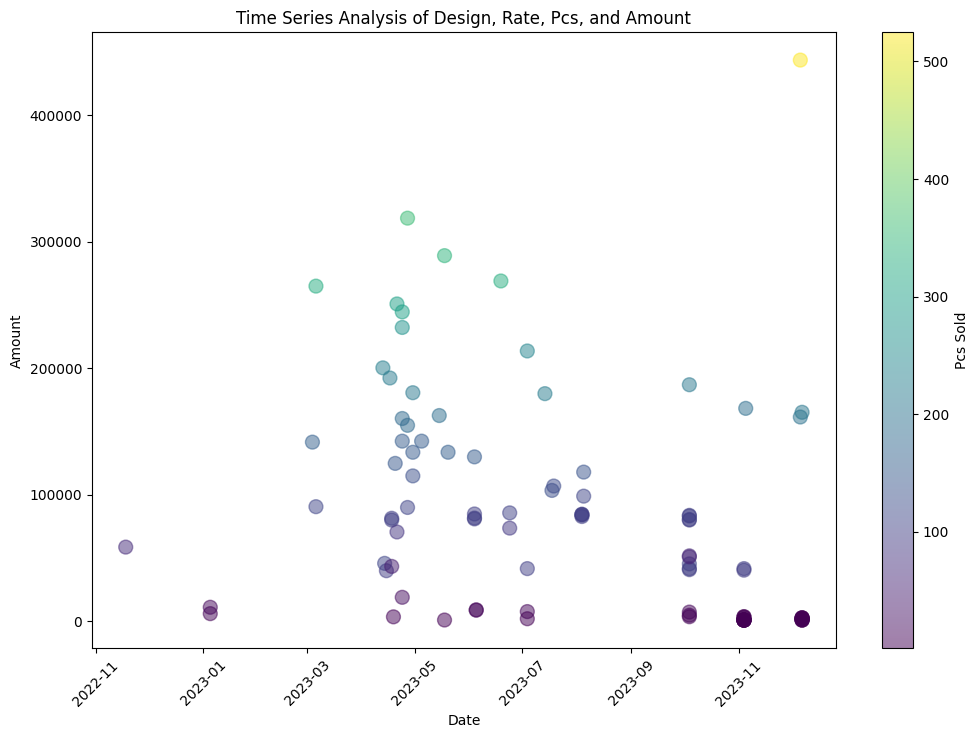

In [ ]:
# Convert the 'Date' column to a datetime data type
data['Date'] = pd.to_datetime(data['Date'])

# Filter the data for 'Saree' category
saree_data = data[data['Description of Goods'] == 'NYLON SAREE']

# Extract relevant columns
design = saree_data['Design']
rate = saree_data['Rate']
pcs = saree_data['Pcs. ']
amount = saree_data['Amount']
date = saree_data['Date']

# Create a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(date, amount, c=pcs, cmap='viridis', s=100, alpha=0.5)

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Time Series Analysis of Design, Rate, Pcs, and Amount')

# Add color bar
plt.colorbar(label='Pcs Sold')

# Show the plot
plt.xticks(rotation=45)
plt.show()


In [ ]:
'''The embroidery production machines at Nakshatra Fab are sophisticated pieces of technology, enabling efficient and
precise manufacturing of intricate designs. However, these machines can be complex to operate, especially when
transitioning to produce new and diverse designs. Adjusting machine settings and configurations for various
designs may entail additional costs and time, particularly when dealing with a large quantity of different
designs. It's essential to strike a balance between offering a wide range of designs to meet customer preferences
and optimizing the production process for cost-effectiveness and timely delivery.'''

"The embroidery production machines at Nakshatra Fab are sophisticated pieces of technology, enabling efficient and \nprecise manufacturing of intricate designs. However, these machines can be complex to operate, especially when \ntransitioning to produce new and diverse designs. Adjusting machine settings and configurations for various \ndesigns may entail additional costs and time, particularly when dealing with a large quantity of different \ndesigns. It's essential to strike a balance between offering a wide range of designs to meet customer preferences \nand optimizing the production process for cost-effectiveness and timely delivery."

In [ ]:
'''October-January, 800-1000, 300 to optimize the cost, price, inventory management...etc '''

'October-January, 800-1000, 300 to optimize the cost, price, inventory management...etc '

In [ ]:
df = data

<ipython-input-19-f359db401375>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_designs['Contribution Percentage'] = (top_5_designs['Amount'] / total_revenue) * 100


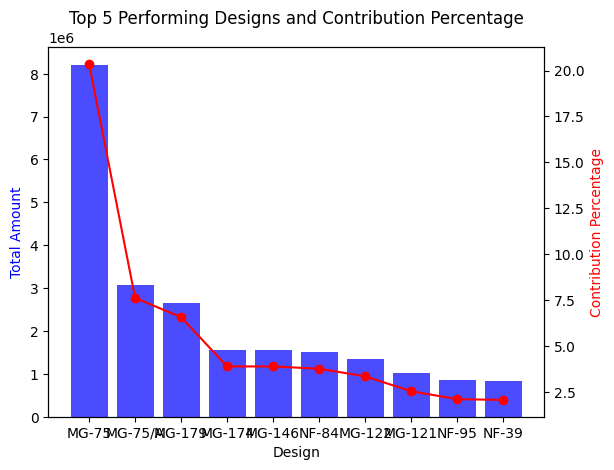

In [ ]:
# Group by Design and calculate the total amount for each design
design_total_amount = df.groupby('Design')['Amount'].sum().reset_index()

# Sort the data by total amount in descending order
design_total_amount = design_total_amount.sort_values(by='Amount', ascending=False)

# Select the top 5 performing designs
top_5_designs = design_total_amount.head(10)

# Calculate the contribution percentage
total_revenue = design_total_amount['Amount'].sum()
top_5_designs['Contribution Percentage'] = (top_5_designs['Amount'] / total_revenue) * 100

# Plotting the bar chart
fig, ax1 = plt.subplots()

# Bar plot for Total Amount
ax1.bar(top_5_designs['Design'], top_5_designs['Amount'], color='b', alpha=0.7, label='Total Amount')

# Creating a second y-axis for Contribution Percentage
ax2 = ax1.twinx()
ax2.plot(top_5_designs['Design'], top_5_designs['Contribution Percentage'], color='r', marker='o', label='Contribution Percentage')

# Formatting
ax1.set_xlabel('Design')
ax1.set_ylabel('Total Amount', color='b')
ax2.set_ylabel('Contribution Percentage', color='r')

plt.title('Top 5 Performing Designs and Contribution Percentage')
plt.show()


In [ ]:
# Filter the data for Normal Saree category
normal_saree_data = df[df['Description of Goods'] == 'SAREE']

# Group by Design and calculate the total amount for each design
normal_saree_design_total_amount = normal_saree_data.groupby('Design')['Amount'].sum().reset_index()

# Sort the data by total amount in descending order
normal_saree_design_total_amount = normal_saree_design_total_amount.sort_values(by='Amount', ascending=False)

# Select the top 5 performing designs
top_5_normal_saree_designs = normal_saree_design_total_amount.head(5)

# Calculate the contribution percentage
total_normal_saree_revenue = normal_saree_design_total_amount['Amount'].sum()
top_5_normal_saree_designs['Contribution Percentage'] = (top_5_normal_saree_designs['Amount'] / total_normal_saree_revenue) * 100

# Plotting the bar chart
fig, ax1 = plt.subplots()

# Bar plot for Total Amount in light blue
ax1.bar(top_5_normal_saree_designs['Design'], top_5_normal_saree_designs['Amount'], color='lightblue', alpha=0.7, label='Total Amount')

# Creating a second y-axis for Contribution Percentage
ax2 = ax1.twinx()
ax2.plot(top_5_normal_saree_designs['Design'], top_5_normal_saree_designs['Contribution Percentage'], color='r', marker='o', label='Contribution Percentage')

# Formatting
ax1.set_xlabel('Design')
ax1.set_ylabel('Total Amount', color='lightblue')
ax2.set_ylabel('Contribution Percentage', color='r')

plt.title('Top 5 Performing Designs in Normal Saree Category and Contribution Percentage')
plt.show()


NameError: name 'data' is not defined

<ipython-input-20-73fe4a1e7a9f>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_normal_saree_designs['Contribution Percentage'] = (top_5_normal_saree_designs['Amount'] / total_normal_saree_revenue) * 100


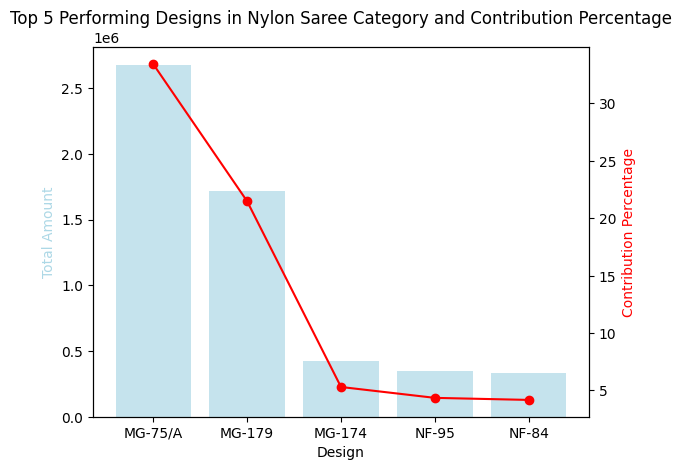

In [ ]:
# Filter the data for Normal Saree category
normal_saree_data = df[df['Description of Goods'] == 'NYLON SAREE']

# Group by Design and calculate the total amount for each design
normal_saree_design_total_amount = normal_saree_data.groupby('Design')['Amount'].sum().reset_index()

# Sort the data by total amount in descending order
normal_saree_design_total_amount = normal_saree_design_total_amount.sort_values(by='Amount', ascending=False)

# Select the top 5 performing designs
top_5_normal_saree_designs = normal_saree_design_total_amount.head(5)

# Calculate the contribution percentage
total_normal_saree_revenue = normal_saree_design_total_amount['Amount'].sum()
top_5_normal_saree_designs['Contribution Percentage'] = (top_5_normal_saree_designs['Amount'] / total_normal_saree_revenue) * 100

# Plotting the bar chart
fig, ax1 = plt.subplots()

# Bar plot for Total Amount in light blue
ax1.bar(top_5_normal_saree_designs['Design'], top_5_normal_saree_designs['Amount'], color='lightblue', alpha=0.7, label='Total Amount')

# Creating a second y-axis for Contribution Percentage
ax2 = ax1.twinx()
ax2.plot(top_5_normal_saree_designs['Design'], top_5_normal_saree_designs['Contribution Percentage'], color='r', marker='o', label='Contribution Percentage')

# Formatting
ax1.set_xlabel('Design')
ax1.set_ylabel('Total Amount', color='lightblue')
ax2.set_ylabel('Contribution Percentage', color='r')

plt.title('Top 5 Performing Designs in Nylon Saree Category and Contribution Percentage')
plt.show()


<ipython-input-25-3a39da79b04a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_designs['Contribution (%)'] = (top_10_designs['Amount'] / total_revenue) * 100


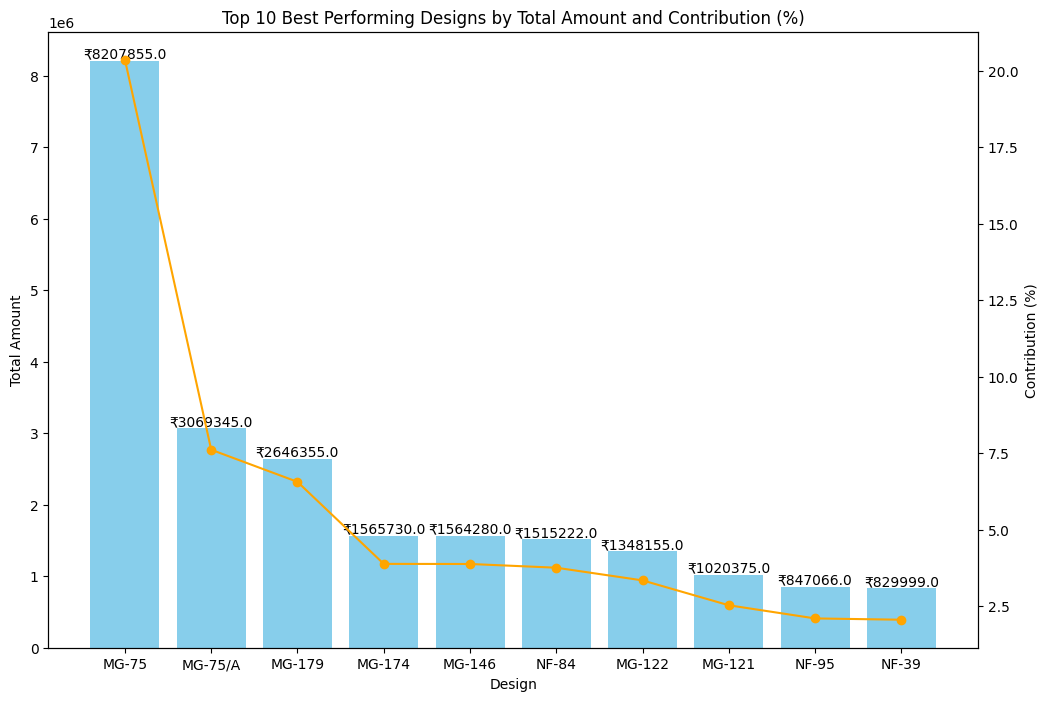

In [ ]:
# Assuming 'Design' and 'Total Amount' are the relevant columns in your DataFrame
design_amount = df.groupby('Design')['Amount'].sum().reset_index()

# Sort the data by 'Total Amount' in descending order
design_amount = design_amount.sort_values(by='Amount', ascending=False)

# Take the top 10 designs
top_10_designs = design_amount.head(10)

# Calculate the percentage contribution
total_revenue = design_amount['Amount'].sum()
top_10_designs['Contribution (%)'] = (top_10_designs['Amount'] / total_revenue) * 100

# Plot the bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(top_10_designs['Design'], top_10_designs['Amount'], color='skyblue')

# Annotate bars with the rate
for bar, rate in zip(bars, top_10_designs['Amount']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 100, f'₹{rate}', ha='center', va='bottom')

# Set labels and title
plt.xlabel('Design')
plt.ylabel('Total Amount')
plt.title('Top 10 Best Performing Designs by Total Amount and Contribution (%)')

# Show the percentage contribution on a secondary y-axis
ax2 = plt.gca().twinx()
ax2.set_ylabel('Contribution (%)')
ax2.plot(top_10_designs['Design'], top_10_designs['Contribution (%)'], color='orange', marker='o')

# Display the plot
plt.show()


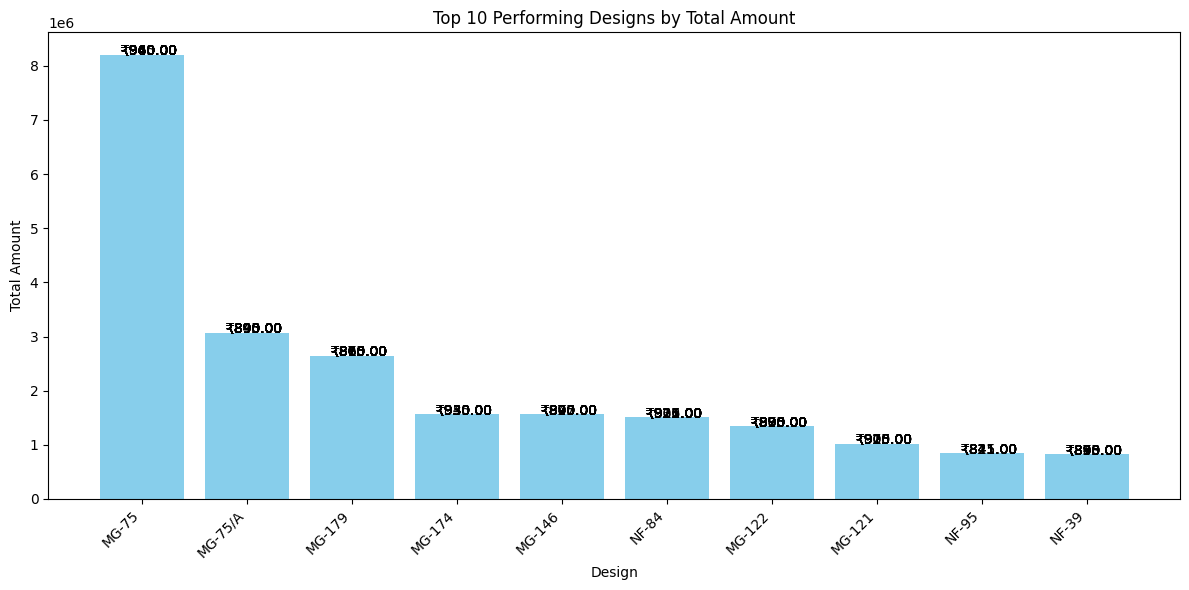

In [ ]:
# Convert 'Rate' to numeric (remove commas, convert to float)
df['Rate'] = df['Rate'].replace({',': ''}, regex=True).astype(float)

# Group by 'Design', summing up the 'Amount' for each design
design_sales = df.groupby('Design')['Amount'].sum().reset_index()

# Sort the designs based on total amount generated
design_sales = design_sales.sort_values(by='Amount', ascending=False)

# Take the top 10 designs
top_10_designs = design_sales.head(10)

# Ensure 'Rate' column is present in top_10_designs
if 'Rate' not in top_10_designs.columns:
    # Merge with the original DataFrame to get the 'Rate' column
    top_10_designs = pd.merge(top_10_designs, df[['Design', 'Rate']], on='Design', how='left')

# Calculate the percentage contribution
total_revenue = design_sales['Amount'].sum()
top_10_designs['Contribution (%)'] = (top_10_designs['Amount'] / total_revenue) * 100

# Plot the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_designs['Design'], top_10_designs['Amount'], color='skyblue')

# Annotate each bar with its rate
for bar, rate in zip(bars, top_10_designs['Rate']):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.2, bar.get_height() + 500, f"₹{rate:.2f}", fontsize=10)

# Add labels and title
plt.xlabel('Design')
plt.ylabel('Total Amount')
plt.title('Top 10 Performing Designs by Total Amount')
plt.xticks(rotation=45, ha='right')

# Display the percentage contribution on top of each bar
'''for bar, percent in zip(bars, top_10_designs['Contribution (%)']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2000, f"{percent:.2f}%", ha='center', fontsize=8)'''

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
design_sales.head(10)

,Design,Amount
61,MG-75,8207855.0
62,MG-75/A,3069345.0
36,MG-179,2646355.0
33,MG-174,1565730.0
23,MG-146,1564280.0
95,NF-84,1515222.0
12,MG-122,1348155.0
11,MG-121,1020375.0
97,NF-95,847066.0
81,NF-39,829999.0


<ipython-input-38-a82db0386f01>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_5_designs = top_5_designs.append({'Design': 'Other Designs', 'Amount': other_designs_amount, 'Percentage': other_designs_percentage}, ignore_index=True)


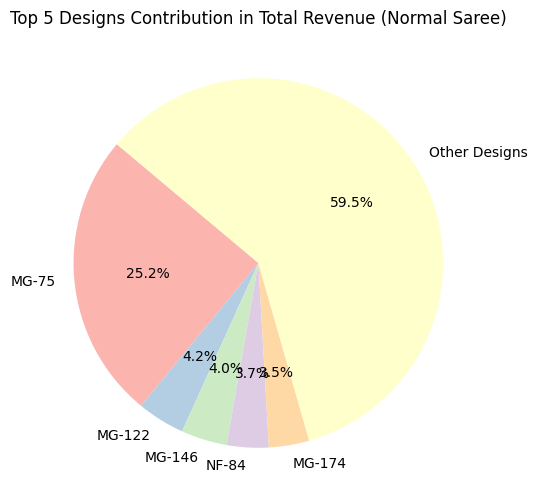

In [ ]:
# Assuming your DataFrame is named 'df'
# Replace 'Amount', 'Rate', 'Design', and 'Description of Goods' with the actual column names in your dataset

# Convert 'Amount' column to numeric
#df['Amount'] = pd.to_numeric(df['Amount'].str.replace(',', ''), errors='coerce')

# Filter data for 'Normal Saree' category
normal_saree_data = df[df['Description of Goods'] == 'SAREE']

# Group by 'Design' and sum the 'Amount' for top 5 designs
top_5_designs = normal_saree_data.groupby('Design')['Amount'].sum().nlargest(5).reset_index()

# Calculate the total revenue for 'Normal Saree'
total_revenue_normal_saree = normal_saree_data['Amount'].sum()

# Calculate the percentage contribution
top_5_designs['Percentage'] = (top_5_designs['Amount'] / total_revenue_normal_saree) * 100

# Add "Other Designs" category
other_designs_amount = total_revenue_normal_saree - top_5_designs['Amount'].sum()
other_designs_percentage = (other_designs_amount / total_revenue_normal_saree) * 100

# Append "Other Designs" to the top designs dataframe
top_5_designs = top_5_designs.append({'Design': 'Other Designs', 'Amount': other_designs_amount, 'Percentage': other_designs_percentage}, ignore_index=True)

# Plotting the pie chart
colors = plt.get_cmap('Pastel1').colors
plt.figure(figsize=(10, 6))
plt.pie(top_5_designs['Amount'], labels=top_5_designs['Design'], autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Top 5 Designs Contribution in Total Revenue (Normal Saree)')
plt.show()


<ipython-input-39-ead06c11be61>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_5_designs = top_5_designs.append({'Design': 'Other Designs', 'Amount': other_designs_amount, 'Percentage': other_designs_percentage}, ignore_index=True)


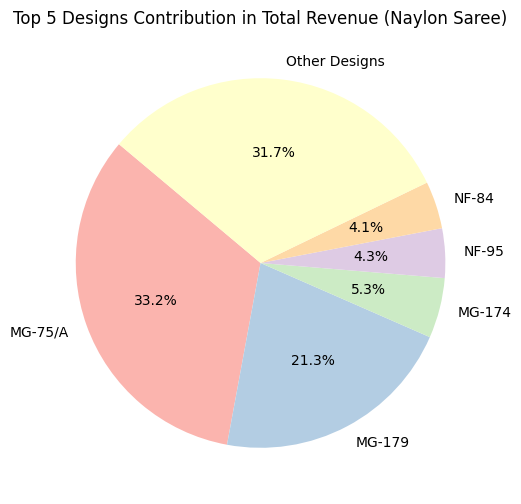

In [ ]:
# Assuming your DataFrame is named 'df'
# Replace 'Amount', 'Rate', 'Design', and 'Description of Goods' with the actual column names in your dataset

# Convert 'Amount' column to numeric
#df['Amount'] = pd.to_numeric(df['Amount'].str.replace(',', ''), errors='coerce')

# Filter data for 'Normal Saree' category
normal_saree_data = df[df['Description of Goods'] == 'NYLON SAREE']

# Group by 'Design' and sum the 'Amount' for top 5 designs
top_5_designs = normal_saree_data.groupby('Design')['Amount'].sum().nlargest(5).reset_index()

# Calculate the total revenue for 'Normal Saree'
total_revenue_normal_saree = normal_saree_data['Amount'].sum()

# Calculate the percentage contribution
top_5_designs['Percentage'] = (top_5_designs['Amount'] / total_revenue_normal_saree) * 100

# Add "Other Designs" category
other_designs_amount = total_revenue_normal_saree - top_5_designs['Amount'].sum()
other_designs_percentage = (other_designs_amount / total_revenue_normal_saree) * 100

# Append "Other Designs" to the top designs dataframe
top_5_designs = top_5_designs.append({'Design': 'Other Designs', 'Amount': other_designs_amount, 'Percentage': other_designs_percentage}, ignore_index=True)

# Plotting the pie chart
colors = plt.get_cmap('Pastel1').colors
plt.figure(figsize=(10, 6))
plt.pie(top_5_designs['Amount'], labels=top_5_designs['Design'], autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Top 5 Designs Contribution in Total Revenue (Naylon Saree)')
plt.show()


In [ ]:
total_revenue = df['Amount'].astype(float).sum()
print(f'Total Revenue: {total_revenue}')

Total Revenue: 41807953.0


In [ ]:
# Assuming df is your DataFrame
# Make sure to replace 'Amount' and 'Rate' with the actual column names in your dataset
top_10_designs = df.groupby('Design').agg({'Amount': 'sum', 'Rate': 'mean'}).nlargest(10, 'Amount').reset_index()
top_10_designs


,Design,Amount,Rate
0,MG-75,8207855.0,941.363636
1,MG-75/A,3069345.0,879.411765
2,MG-179,2646355.0,854.047619
3,MG-174,1565730.0,925.937500
4,MG-146,1564280.0,870.437500
5,NF-84,1515222.0,911.190476
6,MG-122,1348155.0,890.000000
7,MG-121,1020375.0,913.571429
8,NF-95,847066.0,827.545455
9,NF-39,829999.0,868.500000


In [ ]:
# Assuming df is your DataFrame
# Make sure to replace 'Amount' and 'Rate' with the actual column names in your dataset
top_10_designs = df.groupby('Design').agg({'Amount': 'sum', 'Rate': 'mean'}).nlargest(10, 'Amount').reset_index()

# Calculate the total revenue
total_revenue = df['Amount'].sum()

# Calculate the percentage contribution of each design to the total revenue
top_10_designs['Contribution (%)'] = (top_10_designs['Amount'] / total_revenue) * 100

# Print the table
print(top_10_designs[['Design', 'Rate', 'Amount', 'Contribution (%)']])


    Design        Rate     Amount  Contribution (%)
0    MG-75  941.363636  8207855.0         19.632281
1  MG-75/A  879.411765  3069345.0          7.341534
2   MG-179  854.047619  2646355.0          6.329788
3   MG-174  925.937500  1565730.0          3.745053
4   MG-146  870.437500  1564280.0          3.741585
5    NF-84  911.190476  1515222.0          3.624243
6   MG-122  890.000000  1348155.0          3.224638
7   MG-121  913.571429  1020375.0          2.440624
8    NF-95  827.545455   847066.0          2.026088
9    NF-39  868.500000   829999.0          1.985266


In [ ]:
top_10_designs['Contribution (%)'].sum()

54.09110080084523

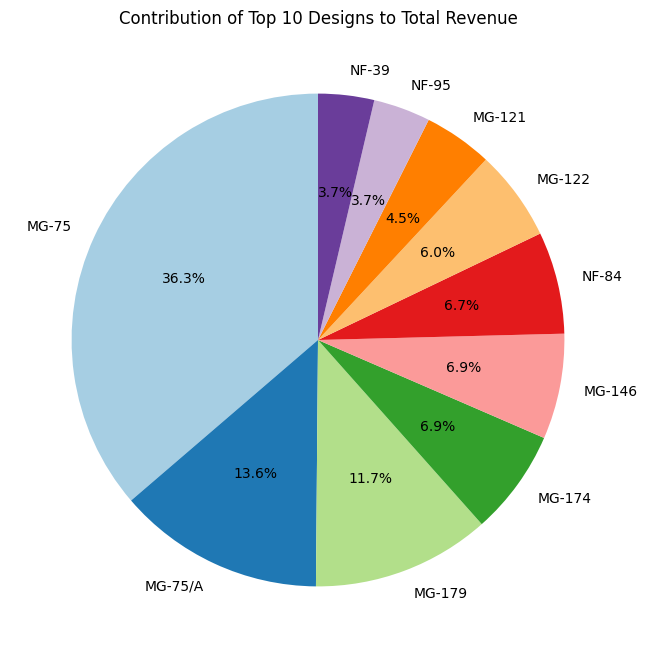

In [ ]:
# Assuming top_10_designs is the DataFrame with the relevant data
labels = top_10_designs['Design']
sizes = top_10_designs['Contribution (%)']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Contribution of Top 10 Designs to Total Revenue')
plt.show()


In [ ]:
# Assuming your data is stored in a DataFrame named 'df'
# Replace 'df' with the actual variable name if it's different

# List of designs
designs_category_1 = ['MG-75', 'MG-122', 'MG-146', 'NF-84', 'MG-174']
designs_category_2 = ['MG-75/A', 'MG-179', 'NF-95', 'NF-84', 'MG-179/A']

# Filter the DataFrame for the specified designs
filtered_designs_1 = df[df['Design'].isin(designs_category_1)]
filtered_designs_2 = df[df['Design'].isin(designs_category_2)]

# Extract relevant columns (Design and Rate)
table_data_1 = filtered_designs_1[['Design', 'Rate']]
table_data_2 = filtered_designs_2[['Design', 'Rate']]

# Display the tables
print("Table for Designs Category 1:")
print(table_data_1)

print("\nTable for Designs Category 2:")
print(table_data_2)


Table for Designs Category 1:
     Design   Rate
6     MG-75  960.0
12   MG-146  900.0
13    MG-75  960.0
17   MG-122  925.0
24    MG-75  960.0
..      ...    ...
491  MG-174  930.0
501  MG-174  845.0
507  MG-146  825.0
515   MG-75  845.0
529  MG-146  825.0

[111 rows x 2 columns]

Table for Designs Category 2:
      Design   Rate
60     NF-84  925.0
62     NF-84  921.0
68     NF-84  925.0
80     NF-84  912.0
123    NF-84  925.0
..       ...    ...
512  MG-75/A  845.0
513   MG-179  815.0
514   MG-179  815.0
516   MG-179  815.0
528    NF-95  845.0

[70 rows x 2 columns]


In [ ]:
# Assuming your data is stored in a DataFrame named 'df'
# Replace 'df' with the actual variable name if it's different

# List of designs
designs_category_1 = ['MG-75', 'MG-122', 'MG-146', 'NF-84', 'MG-174']
designs_category_2 = ['MG-75/A', 'MG-179', 'NF-95', 'NF-84', 'MG-179/A']

# Function to get the row with the maximum rate for each design
def get_max_rate_row(design_list, dataframe):
    return dataframe[dataframe['Design'].isin(design_list)].sort_values('Rate', ascending=False).head(1)

# Get the row with the maximum rate for each design in each category
max_rate_row_category_1 = get_max_rate_row(designs_category_1, df)
max_rate_row_category_2 = get_max_rate_row(designs_category_2, df)

# Display the tables
print("Table for Designs Category 1 (Maximum Rate):")
print(max_rate_row_category_1[['Design', 'Rate']])

print("\nTable for Designs Category 2 (Maximum Rate):")
print(max_rate_row_category_2[['Design', 'Rate']])


Table for Designs Category 1 (Maximum Rate):
  Design   Rate
6  MG-75  960.0

Table for Designs Category 2 (Maximum Rate):
   Design   Rate
60  NF-84  925.0


In [ ]:
# Assuming your data is stored in a DataFrame named 'df'
# Replace 'df' with the actual variable name if it's different

# List of designs
designs_to_print = ['MG-75', 'MG-122', 'MG-146', 'NF-84', 'MG-174', 'MG-75/A', 'MG-179', 'NF-95', 'NF-84', 'MG-179/A']

# Iterate through the designs and print the corresponding rows
for design in designs_to_print:
    design_row = df[df['Design'] == design]
    print(f"\nTable for Design {design}:")
    print(design_row[['Design', 'Rate']])



Table for Design MG-75:
    Design   Rate
6    MG-75  960.0
13   MG-75  960.0
24   MG-75  960.0
27   MG-75  960.0
28   MG-75  960.0
32   MG-75  960.0
39   MG-75  960.0
55   MG-75  940.0
78   MG-75  940.0
125  MG-75  940.0
160  MG-75  940.0
161  MG-75  940.0
173  MG-75  940.0
192  MG-75  940.0
209  MG-75  940.0
212  MG-75  940.0
222  MG-75  940.0
251  MG-75  940.0
279  MG-75  940.0
281  MG-75  940.0
303  MG-75  940.0
316  MG-75  940.0
321  MG-75  940.0
332  MG-75  940.0
344  MG-75  940.0
373  MG-75  940.0
387  MG-75  940.0
388  MG-75  940.0
396  MG-75  940.0
405  MG-75  940.0
406  MG-75  940.0
432  MG-75  940.0
515  MG-75  845.0

Table for Design MG-122:
     Design   Rate
17   MG-122  925.0
42   MG-122  890.0
49   MG-122  890.0
57   MG-122  885.0
73   MG-122  890.0
79   MG-122  890.0
88   MG-122  895.0
101  MG-122  895.0
142  MG-122  890.0
155  MG-122  900.0
156  MG-122  870.0
178  MG-122  890.0
181  MG-122  890.0
199  MG-122  870.0
214  MG-122  890.0
253  MG-122  890.0
256  MG-122  8